<a href="https://colab.research.google.com/github/cerenkilinc/DSA210_Project_CerenKilinc/blob/main/dsa210_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import pandas as pd


# Loading the data to the code
crime_index = pd.read_csv("World Crime Index .csv")
happiness_report = pd.read_csv("World Happiness Report up to 2022.csv")
school_enrollment = pd.read_csv("School enrollment, primary (% gross).csv",header=4)
life_expectancy = pd.read_csv("Life expectancy at birth, total (years).csv",header=4)


In [11]:
year = '2022'

# Taking only the country and the values that is needed from the tables and
# giving more meaningfull names and standarize the country column name
# Taking only the 2022 years value
# For the happines report the values are separeted wih coma but we need to change it to the float format.
happiness_report['Happiness_2022'] = happiness_report['Happiness score'].str.replace(',', '.').astype(float)
happiness_2022 = happiness_report[['Country', 'Happiness_2022']]
school_2022 = school_enrollment.rename(columns={'Country Name': 'Country'})[['Country', year]].rename(columns={year: 'Education_2022'})
life_2022 = life_expectancy.rename(columns={'Country Name': 'Country'})[['Country', year]].rename(columns={year: 'LifeExp_2022'})
# In the crime index data there is not only the countries there are crime numbers by citiies so because of that
# From the citiy coulmn we take the country name and we take the mean of it by the country using grouping we calculate crime index by country


crime_index['Country'] = crime_index['City'].str.split(',').str[-1].str.strip()
crime_country = crime_index.groupby('Country', as_index=False)['Crime Index'].mean()
crime_country = crime_country.rename(columns={'Crime Index': 'CrimeIndex_2022'})


In [12]:
merged_data = (
    happiness_2022
    .merge(school_2022, on='Country', how='left')
    .merge(life_2022, on='Country', how='left')
    .merge(crime_country, on='Country', how='left')
)
display(merged_data)
turkey = merged_data[merged_data['Country'] == 'Turkey']
display(turkey)

# İn the display it can be seen that there are some NaN parts

,Country,Happiness_2022,Education_2022,LifeExp_2022,CrimeIndex_2022
0,Finland,7.821,98.619019,81.187805,27.763333
1,Denmark,7.636,100.244453,81.304878,24.270000
2,Iceland,7.557,98.511642,82.119512,23.020000
3,Switzerland,7.512,101.363068,83.604878,21.156667
4,Netherlands,7.415,104.215446,81.614634,27.235000
...,...,...,...,...,...
142,Rwanda*,3.268,NaN,NaN,NaN
143,Zimbabwe,2.995,93.165966,62.360000,60.350000
144,Lebanon,2.955,76.454123,78.003000,46.670000
145,Afghanistan,2.404,NaN,65.617000,79.390000


,Country,Happiness_2022,Education_2022,LifeExp_2022,CrimeIndex_2022
111,Turkey,4.744,NaN,NaN,32.01


In [13]:
# İn the data there are some parts that Turkey is writen differently
# For that the name is replaced and standarized to the Turkey
happiness_2022['Country'] = happiness_2022['Country'].str.strip().replace({'Turkiye': 'Turkey', 'Türkiye': 'Turkey'})
school_2022['Country'] = school_2022['Country'].str.strip().replace({'Turkiye': 'Turkey', 'Türkiye': 'Turkey'})
life_2022['Country'] = life_2022['Country'].str.strip().replace({'Turkiye': 'Turkey', 'Türkiye': 'Turkey'})
crime_country['Country'] = crime_country['Country'].str.strip().replace({'Turkiye': 'Turkey', 'Türkiye': 'Turkey'})

/tmp/ipython-input-2916183456.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  happiness_2022['Country'] = happiness_2022['Country'].str.strip().replace({'Turkiye': 'Turkey', 'Türkiye': 'Turkey'})


In [18]:
merge_final = (
    happiness_2022
    .merge(school_2022, on='Country', how='left')
    .merge(life_2022, on='Country', how='left')
    .merge(crime_country, on='Country', how='left')
)
turkey = merge_final[merge_final['Country'] == 'Turkey']
display(turkey)


,Country,Happiness_2022,Education_2022,LifeExp_2022,CrimeIndex_2022
111,Turkey,4.744,102.487701,77.591,32.01


In [16]:
merge_final['EduCrimeRatio'] = merge_final['Education_2022'] / merge_final['CrimeIndex_2022']
merge_final['HapCrimeRatio'] = merge_final['Happiness_2022'] / merge_final['CrimeIndex_2022']
merge_final['LifeCrimeRatio'] = merge_final['LifeExp_2022'] / merge_final['CrimeIndex_2022']
turkey_metrics = merge_final[merge_final['Country'] == 'Turkey'][
    ['Country', 'CrimeIndex_2022','Education_2022','Happiness_2022', 'LifeExp_2022','EduCrimeRatio',
      'HapCrimeRatio',  'LifeCrimeRatio']
]

display(turkey_metrics)


,Country,CrimeIndex_2022,Education_2022,Happiness_2022,LifeExp_2022,EduCrimeRatio,HapCrimeRatio,LifeCrimeRatio
111,Turkey,32.01,102.487701,4.744,77.591,3.20174,0.148204,2.423961


In [22]:
df_corr = merge_final[['Happiness_2022', 'Education_2022', 'LifeExp_2022', 'CrimeIndex_2022']].dropna()
print("\n Korelasyon Matrisi (2022) ")
display(df_corr.corr())


 Korelasyon Matrisi (2022) 


,Happiness_2022,Education_2022,LifeExp_2022,CrimeIndex_2022
Happiness_2022,1.000000,0.150312,0.706978,-0.369130
Education_2022,0.150312,1.000000,0.147391,-0.007486
LifeExp_2022,0.706978,0.147391,1.000000,-0.503542
CrimeIndex_2022,-0.369130,-0.007486,-0.503542,1.000000


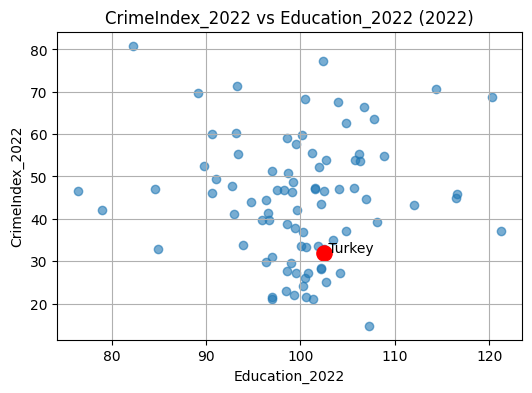

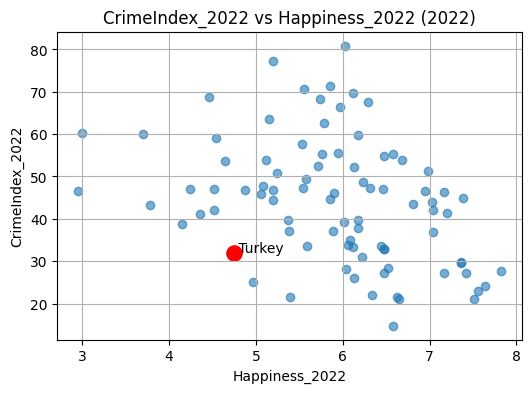

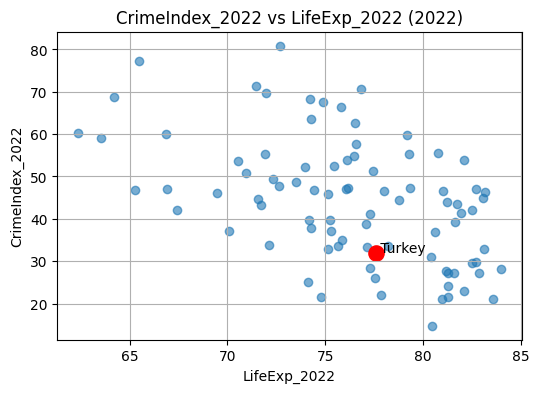

In [25]:
import matplotlib.pyplot as plt

def scatter(x, y):
    plt.figure(figsize=(6,4))
    plt.scatter(df_corr[x], df_corr[y], alpha=0.6)

    # Türkiye'yi işaretleyerek scaterplot ver
    if 'Turkey' in merge_final['Country'].values:
        tur = merge_final[merge_final['Country']=='Turkey'].iloc[0]
        if not pd.isna(tur[x]) and not pd.isna(tur[y]):
            plt.scatter(tur[x], tur[y], s=120, color='red')
            plt.text(tur[x], tur[y], ' Turkey', fontsize=10)

    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(f"{y} vs {x} (2022)")
    plt.grid(True)
    plt.show()

# RQ1:  To what extent does a higher education rate contribute to a reduction in crime perception for Turkey?
scatter('Education_2022', 'CrimeIndex_2022')
# RQ2: Is there a significant negative relationship between happiness levels and the crime index?
scatter('Happiness_2022', 'CrimeIndex_2022')
# RQ3: How does life expectancy, as an indicator of overall health and social well-being, influence crime levels?
scatter('LifeExp_2022', 'CrimeIndex_2022')


In [28]:
# it gives the correlation values
corr = df_corr.corr()
print("\nRQ1 : Education - Crime:", corr.loc['Education_2022','CrimeIndex_2022'])
print("RQ2 : Happiness - Crime:", corr.loc['Happiness_2022','CrimeIndex_2022'])
print("RQ3 : LifeExp - Crime:", corr.loc['LifeExp_2022','CrimeIndex_2022'])

# finding the highest corelation to the crime index
corr_dict = {
    'Education_2022': abs(corr.loc['Education_2022','CrimeIndex_2022']),
    'Happiness_2022': abs(corr.loc['Happiness_2022','CrimeIndex_2022']),
    'LifeExp_2022': abs(corr.loc['LifeExp_2022','CrimeIndex_2022']) }
strongest = max(corr_dict, key=corr_dict.get)
print("\nRQ4 – Strongest correlation:", strongest, "with value:", corr_dict[strongest])



RQ1 : Education - Crime: -0.007486376645385391
RQ2 : Happiness - Crime: -0.36912950951605433
RQ3 : LifeExp - Crime: -0.5035415312519691

RQ4 – Strongest correlation: LifeExp_2022 with value: 0.5035415312519691


In [30]:
import statsmodels.api as sm
from scipy.stats import pearsonr

# For comparison and regression analysis we need to consider for other countries too.
# droping the non value parts from the merged data
cols = ['CrimeIndex_2022', 'Happiness_2022', 'Education_2022', 'LifeExp_2022', 'Country']
data=merge_final[cols].dropna().reset_index(drop=True)
data.head()


,CrimeIndex_2022,Happiness_2022,Education_2022,LifeExp_2022,Country
0,27.763333,7.821,98.619019,81.187805,Finland
1,24.270000,7.636,100.244453,81.304878,Denmark
2,23.020000,7.557,98.511642,82.119512,Iceland
3,21.156667,7.512,101.363068,83.604878,Switzerland
4,27.235000,7.415,104.215446,81.614634,Netherlands


In [34]:
y = data['CrimeIndex_2022']
for variable in ['Happiness_2022', 'Education_2022', 'LifeExp_2022']:
    r, p = pearsonr(data[variable], y)
    print(f"{variable} & CrimeIndex_2022 --> r = {r:.5f}, p = {p:.5f}")

Happiness_2022 & CrimeIndex_2022 --> r = -0.36913, p = 0.00043
Education_2022 & CrimeIndex_2022 --> r = -0.00749, p = 0.94513
LifeExp_2022 & CrimeIndex_2022 --> r = -0.50354, p = 0.00000


In [35]:
X = data[['Happiness_2022', 'Education_2022', 'LifeExp_2022']]
y = data['CrimeIndex_2022']
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        CrimeIndex_2022   R-squared:                       0.259
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     9.652
Date:                Sun, 30 Nov 2025   Prob (F-statistic):           1.56e-05
Time:                        14:24:43   Log-Likelihood:                -342.91
No. Observations:                  87   AIC:                             693.8
Df Residuals:                      83   BIC:                             703.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const            139.2502     27.282      5.

In [28]:
# selecting turkey and calculating the predicted and actual crime index and their difference
tur = data[data['Country'] == 'Turkey'].iloc[0]
X_turkey = pd.DataFrame({
    'const': [1],
    'Happiness_2022': [tur['Happiness_2022']],
    'Education_2022': [tur['Education_2022']],
    'LifeExp_2022': [tur['LifeExp_2022']]
})
#
turkey_pred = model.predict(X_turkey)[0]
turkey_actual = tur['CrimeIndex_2022']

print("Turkey Actual Crime Index:", turkey_actual)
print("Turkey Predicted Crime Index:", turkey_pred)
print("Difference (Actual - Predicted):", turkey_actual - turkey_pred)


Turkey Actual Crime Index: 32.01
Turkey Predicted (Model) Crime Index: 43.21646081305087
Difference (Actual - Predicted): -11.206460813050874
